In [8]:

# import the necessary packages
# from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import imutils



image number 3


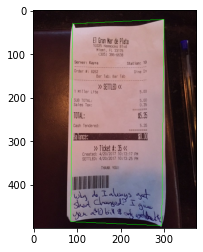

0.6056410074234009
image number 4


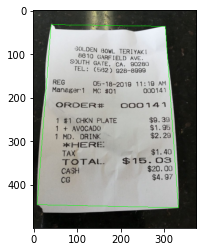

1.2415097951889038
image number 7


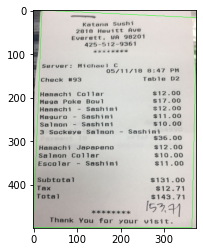

2.2951955795288086
image number 8


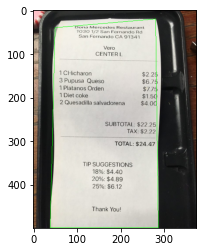

0.7176513671875
image number 10


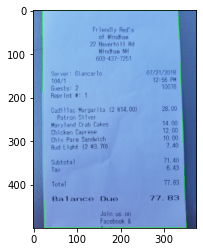

0.4592742919921875
image number 11


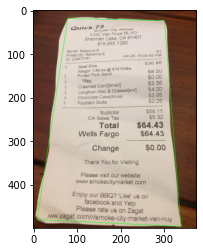

2.784227132797241
image number 12


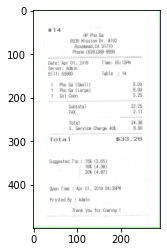

0.0
image number 13


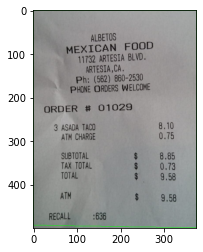

0.0
image number 15


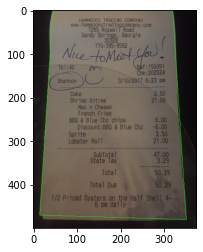

1.7098138332366943
image number 16


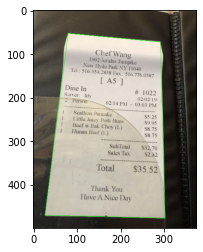

1.4634425640106201
10


In [44]:
# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
def biggest_contour(contours):
        biggest = np.array([])
        max_area = 0
        for i in contours:
            area = cv2.contourArea(i)
            if area > 58000:
                peri = cv2.arcLength(i, True)
                approx = cv2.approxPolyDP(i, 0.015 * peri, True)
                if area > max_area and len(approx) == 4:
                    biggest = approx
                    max_area = area
        return biggest
    
def order_points(pts):
        rect = np.zeros((4, 2), dtype = "float32")

        s = np.sum(pts,axis = 1)

        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]
        
        diff = np.diff(pts, axis = 1)
        rect[3] = pts[np.argmin(diff)]
        rect[1] = pts[np.argmax(diff)]
     
        # return the ordered coordinates
        return rect
        
      

cont = 0

for i in range(20):
    image = cv2.imread('./images/1'+str(i).zfill(3) +'-receipt.jpg')
    ratio = image.shape[0] / 500.0
    orig = image.copy()
    image = imutils.resize(image, height = 500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.bilateralFilter(gray, 20, 30, 30)
    edged = cv2.Canny(gray, 50, 150)
    
    cnts = None
    cnts, hierarchy  = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

    
    screenCnt = None
    screenCnt = biggest_contour(cnts)
    
    if(len(screenCnt)==0 ):
        edged = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,13,0.5)
        cnts = None
        cnts, hierarchy  = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

        
        screenCnt = None
        screenCnt = biggest_contour(cnts)
    
    if(len(screenCnt) >0 ):
        cont +=1
        # show the contour (outline) of the piece of paper
        # print("STEP 2: Find contours of paper")
        cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 1)
        print("image number " + str(i))

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        
        
        screenCnt = order_points(screenCnt[:,0,:])
        angle = cv2.minAreaRect(screenCnt)[-1]
        angle = 90 - angle if (angle>45) else angle
        
        print(angle)
    # else:
        # print("nao foi encontrado o contorno")
        
print(cont)
# cv2.imshow("Outline", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


STEP 2: Find contours of paper


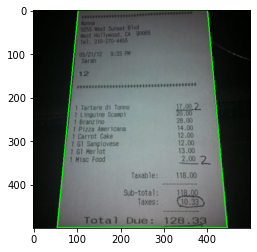

ValueError: attempt to get argmin of an empty sequence

In [90]:
def order_points(pts):
      
	rect = np.zeros((4, 2), dtype = "float32")

	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.015 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest

# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = None
cnts, hierarchy  = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]


# # loop over the contours
# for c in cnts:
# 	# approximate the contour
# 	peri = cv2.arcLength(c, True)
# 	approx = cv2.approxPolyDP(c, 0.01 * peri, True)
# 	# if our approximated contour has four points, then we
# 	# can assume that we have found our screen
# 	screenCnt = approx
# 	if len(approx) == 4:
# 		screenCnt = approx
# 		break

screenCnt = None
screenCnt = biggest_contour(cnts)
if(len(screenCnt) >0):
    # show the contour (outline) of the piece of paper
    print("STEP 2: Find contours of paper")
    cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

    # image_e = cv2.resize(image,(image.shape[1],image.shape[0]))

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    angle = cv2.minAreaRect(order_points(screenCnt))[-1]
    
    print(angle)
else:
    print("nao foi encontrado o contorno")
# cv2.imshow("Outline", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [87]:
def four_point_transform(image, pts):
    	# obtain a consistent order of the points and unpack them
	# individually
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	print(M)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
	return warped

In [88]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

[[ 1.30572379e+00  1.25600708e-01 -9.36047314e+01]
 [-4.59862513e-17  1.31303882e+00 -4.43631809e-15]
 [ 4.60374293e-20  9.04651540e-04  1.00000000e+00]]
